<img style="float: left;" src="earth-lab-logo-rgb.png" width="150" height="150" />

# Earth Analytics Education - Bootcamp Course Fall 2020

## Important  - Assignment Guidelines

1. Before you submit your assignment to GitHub, make sure to run the entire notebook with a fresh kernel. To do this first, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart & Run All)
2. Always replace the `raise NotImplementedError()` code with your code that addresses the activity challenge. If you don't replace that code, your notebook will not run.

```
# YOUR CODE HERE
raise NotImplementedError()
```

3. Any open ended questions will have a "YOUR ANSWER HERE" within a markdown cell. Replace that text with your answer also formatted using Markdown.
4. **DO NOT RENAME THIS NOTEBOOK File!** If the file name changes, the autograder will not grade your assignment properly.
6. When you create a figure, comment out `plt.show()` to ensure the autograder can grade your plots. For figure cells, DO NOT DELETE the code that says `DO NOT REMOVE LINE BELOW`.

```
### DO NOT REMOVE LINE BELOW ###
student_plot1_ax = nb.convert_axes(plt)
```

* Only include the package imports, code, and outputs that are required to run your homework assignment.
* Be sure that your code can be run on any operating system. This means that:
   1. the data should be downloaded in the notebook to ensure it's reproducible
   2. all paths should be created dynamically using the `os.path.join`

## Follow to PEP 8 Syntax Guidelines & Documentation

* Run the `autopep8` tool on all cells prior to submitting (HINT: hit shift + the tool to run it on all cells at once!
* Use clear and expressive names for variables. 
* Organize your code to support readability.
* Check for code line length
* Use comments and white space sparingly where it is needed
* Make sure all python imports are at the top of your notebook and follow PEP 8 order conventions
* Spell check your Notebook before submitting it.

For all of the plots below, be sure to do the following:

* Make sure each plot has a clear TITLE and, where appropriate, label the x and y axes. Be sure to include UNITS in your labels.


### Add Your Name Below 
**Your Name:** Judith Ament

<img style="float: left;" src="colored-bar.png"/>

---

# Week 8 Homework - Loops & Conditionals

To complete assignment 10, review Chaps 17-18 in Section 7 of the <a href="https://www.earthdatascience.org/courses/intro-to-earth-data-science/" target="_blank">Intro to Earth Data Science online textbook</a> online textbook, which conditional statements and loops in **Python**.   

Read the instructions for each question carefully to successfully complete the required tasks.


## Assignment Data

For this assignment, you will write **Python** code to download and work with data on fire occurrence in California between 1992 and 2015 provided by <a href="https://www.fs.usda.gov/rds/archive/Product/RDS-2013-0009.4/" target="_blank">the United States Forest Service</a>.

In [44]:
# DO NOT MODIFY THIS CELL
# Core imports needed for grading
import matplotcheck.notebook as nb
from matplotcheck.base import PlotTester
import matplotcheck.autograde as ag
import matplotlib
import numpy as np

## Import Python Packages

In the cell below, add code **after the line for `Your Code Here`**, replacing `raise NotImplementedError()` with your code to import the packages/modules needed to:
* create plots 
* set your working directory
* get lists of files in a directory
* download data using earthpy functions
* work with pandas DataFrames

Be sure to list the package imports following the appropriate PEP 8 order and spacing. 


In [45]:
# YOUR CODE HERE
import matplotlib.pyplot as plt
import seaborn as sns
import os as os
from glob import glob
import earthpy as et
import pandas as pd

## Set Working Directory

In the cell below complete the following task:

* **Use a conditional statement** to:
    * Set the working directory to **your `earth-analytics/data` directory in your home directory** if the path exists.
    * Make the directory using `os.makedirs()` and then print a helpful message that the path does not exist but it's being created. 

Reduce repetition in your code with reusable variables. 

Be sure to use the appropriate functions that will allow your code to run successfully on any operating system.

In [46]:
# YOUR CODE HERE
et_data_path = os.path.join(et.io.HOME, "earth-analytics", "data")

if os.path.exists(et_data_path):
    os.chdir(et_data_path)
else:
    os.makedirs(et_data_path)


## Download Data Using EarthPy

In the cell below, add code **after the line for `Your Code Here`**, replacing `raise NotImplementedError()` with your code, to complete the following task:

* **Use EarthPy to download this url: https://ndownloader.figshare.com/files/25033508**: 

In this download, you'll see three directories with files containing data by year:

* ca-fires-yearly/monthly-fire-count
    * The dataset contains the total number of fires (greater than 100 acres) that occurred in each month and year in California between 1992 and 2015. The data are organized with a file for each year from 1992 to 2015.
* ca-fires-yearly/monthly-mean-size
    * The dataset contains the mean fire size (acres) of all fires greater than 100 acres for each month and year in California between 1992 and 2015. The data are organized with a file for each year from 1992 to 2015
* ca-fires-yearly/1992-2015-gt-100-acres
    * The dataset contains the cause of all fires greater than 100 acres in California between 1992 and 2015. The data are organized with a file for each year from 1992 to 2015

In [47]:
# YOUR CODE HERE
file_url = "https://ndownloader.figshare.com/files/25033508"
data_path = et.data.get_data(url = file_url)

SSLError: HTTPSConnectionPool(host='ndownloader.figshare.com', port=443): Max retries exceeded with url: /files/25033508 (Caused by SSLError(SSLError(1, '[SSL: WRONG_VERSION_NUMBER] wrong version number (_ssl.c:1131)')))

In [ ]:
# DO NOT MODIFY THIS CELL
# Tests that the working directory is set to earth-analytics/data

path = os.path.normpath(os.getcwd())
student_wd_parts = path.split(os.sep)

wd_points = 0

if student_wd_parts[-2:] == ['earth-analytics', 'data']:
    print("\u2705 Great - it looks like your working directory is set correctly to .../earth-analytics/data")
    wd_points += 5
else:
    print("\u274C Oops, the autograder will not run unless your working directory is set to earth-analytics/data")

print("\n \u27A1 You received {} out of 5 points for setting your working directory.".format(
    wd_points))
wd_points

✅ Great - it looks like your working directory is set correctly to .../earth-analytics/data

 ➡ You received 5 out of 5 points for setting your working directory.


5

<img style="float: left;" src="colored-bar.png"/>

## Challenge 1: Import Monthly Fire Count Data

In the cell below complete the following task:

* Create a for loop that prints the file name  for each `.csv` file in the `earthpy-downloads\ca-fires-yearly\monthly-fire-count` directory
* In that same loop, extract the date for each year in each `.csv` file name and add it to a new list sorted in order from earliest to most recent  year using `list.append()`.

Your final list should look something like this (with more years however): 

`["1992", "1993", "1994"]`

At the end of the cell, call the list object of years so that it prints below 
the cell as standard output (**do not use the print statement**).

In [ ]:
# YOUR CODE HERE
import re

monthly_fire_count_files = glob(os.path.join(data_path, "monthly-fire-count", "*.csv"))

monthly_fire_count_years = []

for file in monthly_fire_count_files:
    filename = os.path.basename(file)
    print(filename)
    year = re.search('([0-9]{4})\.csv', filename).group(1)
    list.append(monthly_fire_count_years, year)

monthly_fire_count_years.sort()
monthly_fire_count_years


monthly-fire-count-1999.csv
monthly-fire-count-1998.csv
monthly-fire-count-2010.csv
monthly-fire-count-2004.csv
monthly-fire-count-2005.csv
monthly-fire-count-2011.csv
monthly-fire-count-2007.csv
monthly-fire-count-2013.csv
monthly-fire-count-2012.csv
monthly-fire-count-2006.csv
monthly-fire-count-2002.csv
monthly-fire-count-2003.csv
monthly-fire-count-2015.csv
monthly-fire-count-2001.csv
monthly-fire-count-2000.csv
monthly-fire-count-2014.csv
monthly-fire-count-2008.csv
monthly-fire-count-2009.csv
monthly-fire-count-1995.csv
monthly-fire-count-1994.csv
monthly-fire-count-1996.csv
monthly-fire-count-1997.csv
monthly-fire-count-1993.csv
monthly-fire-count-1992.csv


['1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015']

In [ ]:
# Test that the list was created and returned correctly

student_year_list = monthly_fire_count_years

if isinstance(student_year_list, list):
    print("\u2705 The object you created is a list, good job!")
else:
    print("\u274C The object you created is not a list, please make sure to create a list.")

✅ The object you created is a list, good job!


In [ ]:
# DO NOT MODIFY THIS CELL

## Challenge 2: Create A Monthly Fire Count DataFrame With a Year Column

In the cell below use the same for loop structure that you used above to create a dataframe containing 
data for all of the years. The dataframe should have month names as a header and should contain monthly fire counts for each year. 

1. loop through each `.csv` file sorted by name
2. open that file using pandas
3. add a new column to each data.frame that contains the year associated with the data. You will need to extract the year from the file name similar to what you did above. 
3. add the DataFrame object to a list object using `list-name.append()`
4. When you loop is complete:
   * combine all of the dataframes in the list into a new `DataFrame` using `pd.concat(list-name, ax=0)` to combine all of the dataframes in your list into a final dataframe that contains all of the data.
   * Set the "year"  column as an index

Call the final `DataFrame` object at the end of the cell. 

In [51]:
# YOUR CODE HERE
monthly_fire_count_list = []

for file in monthly_fire_count_files:
    data = pd.read_csv(file)
    year = re.search('([0-9]{4})\.csv', file).group(1)
    data["year"] = year
    list.append(monthly_fire_count_list, data)

monthly_fire_count_df = pd.concat(monthly_fire_count_list)
monthly_fire_count_df = monthly_fire_count_df.set_index('year')
monthly_fire_count_df = monthly_fire_count_df.sort_index()
monthly_fire_count_df

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1992,0,1,1,5,23,55,42,66,34,6,4,0
1993,0,0,0,2,27,44,33,30,23,17,9,2
1994,2,0,0,6,8,50,48,55,23,8,0,1
1995,0,1,0,0,11,25,53,35,25,25,11,3
1996,2,0,1,15,39,64,64,93,25,26,3,1
1997,0,0,5,7,28,13,29,28,25,7,1,0
1998,0,0,0,2,2,12,33,47,16,14,5,4
1999,0,2,2,3,7,19,33,89,37,22,3,2
2000,0,0,3,3,5,19,31,22,17,10,0,3


In [12]:
# DO NOT MODIFY THIS CELL
student_dataframe_monthly_count = monthly_fire_count_df

if isinstance(student_dataframe_monthly_count, pd.DataFrame):
    print("\u2705 Object created is a dataframe, good job!")
else:
    print("\u274C Object created is not a dataframe.")

if student_dataframe_monthly_count.index.name == 'year':
    print("\u2705 Successfully read in the year column as the index!")
else:
    print("\u274C The index is not set to the year column.")

✅ Object created is a dataframe, good job!
✅ Successfully read in the year column as the index!


In [13]:
# DO NOT MODIFY THIS CELL

## Challenge 3: Calculate Monthly Mean Fire Count

In the cell below use Pandas to calculate the **mean monthly fire count**.
You should have one value for each month as an output. 

Set the display options to:

`pd.options.display.float_format = '{:.1f}'.format`

To ensure that the values returned are rounded.
Be sure to call the object at the end of the cell so that it renders as cell output.
**DO NOT USE THE PRINT STATEMENT!**

In [14]:
# YOUR CODE HERE
pd.options.display.float_format = '{:.1f}'.format

mean_monthly_fire_count = monthly_fire_count_df.mean(axis = 0)
mean_monthly_fire_count

Jan    0.9
Feb    0.9
Mar    1.5
Apr    3.7
May   14.1
Jun   34.0
Jul   40.3
Aug   37.9
Sep   21.7
Oct   11.5
Nov    3.4
Dec    1.0
dtype: float64

In [15]:
# DO NOT MODIFY THIS CELL

<img style="float: left;" src="colored-bar.png"/>

## Challenge 4: Calculate Yearly Mean Fire Count

In the cell below use pandas to calculate the mean yearly fire count.
HINT: similar to `numpy.mean()`, using `axis=` when you call `.mean()` will help you 
calculate a mean per row (by year) rather than by column (by month). 

For your answer below, use `pd.options.display.float_format = '{:.1f}'.format` to 
ensure that your data values are rounded to one decimal point. 

IMPORTANT: Call the object that contains mean values at the end of the cell so the 
output renders as output below.

In [16]:
# YOUR CODE HERE
mean_yearly_fire_count = monthly_fire_count_df.mean(axis = 1)
mean_yearly_fire_count

year
1999   18.2
1998   11.2
2010    7.8
2004   12.2
2005   14.2
2011   11.6
2007   13.3
2013   10.2
2012   10.6
2006   19.6
2002   13.9
2003   17.5
2015   11.0
2001   12.4
2000    9.4
2014    7.5
2008   23.4
2009   10.0
1995   15.8
1994   16.8
1996   27.8
1997   11.9
1993   15.6
1992   19.8
dtype: float64

In [17]:
# DO NOT MODIFY THIS CELL

<img style="float: left;" src="colored-bar.png"/>

## Challenge 5: Open and Create a Fire Size DataFrame With A Year Column

Use a `for` loop to open and add the data in the directory:

`earthpy-downloads/ca-fire-data/yearly_data/mean_fire_size`

to a new DataFrame following the same steps that you completed above.

1. loop through each `.csv` file sorted by name
2. open that file using pandas
3. add a new column to each `DataFrame` that contains the year associated with the data. You will need to extract the year from the file name similar to what you did above. 
4. Outside of the for loop, combine all of the files into a single DataFrame and set the year column to be an index (just like you did for the fire count data above). 

Call the new DataFrame object at the end of the cell.

In [18]:
# YOUR CODE HERE
monthly_mean_size_files = glob(os.path.join(data_path, "monthly-mean-size", "*.csv"))

monthly_mean_size_list = []
for file in monthly_mean_size_files:
    data = pd.read_csv(file)
    year = re.search("([0-9]{4})\.csv", file).group(1)
    data['year'] = year
    list.append(monthly_mean_size_list, data)

monthly_mean_size_df = pd.concat(monthly_mean_size_list)
monthly_mean_size_df = monthly_mean_size_df.set_index('year')
monthly_mean_size_df = monthly_mean_size_df.sort_index()
monthly_mean_size_df


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1992,0.0,120.0,1800.0,1390.8,402.9,444.7,436.2,2255.9,1684.8,321.7,283.0,0.0
1993,0.0,0.0,0.0,250.5,923.4,1003.0,444.1,804.4,2159.7,7375.5,1451.9,240.0
1994,280.0,0.0,0.0,936.3,1255.9,1364.5,1889.2,2550.0,2755.8,535.6,0.0,250.0
1995,0.0,160.0,0.0,0.0,400.8,1307.8,885.6,1798.8,480.6,1250.1,362.7,179.3
1996,1940.0,0.0,1000.0,3892.9,799.0,1044.0,828.0,4020.1,438.6,3070.8,134.7,150.0
1997,0.0,0.0,406.0,423.0,2277.0,896.7,580.2,4648.3,1050.3,7302.1,375.0,0.0
1998,0.0,0.0,0.0,134.0,198.0,254.8,780.6,1216.7,293.6,3556.6,229.2,246.5
1999,0.0,600.0,1325.0,537.7,2221.7,486.2,1138.3,4971.5,4813.1,4060.6,437.3,2560.5
2000,0.0,0.0,465.0,785.0,277.2,709.9,3826.2,3547.2,863.4,767.6,0.0,337.7


In [19]:
# DO NOT MODIFY THIS CELL
# Visible test that there is a DataFrame with a year index

student_size_df = monthly_mean_size_df

if isinstance(student_size_df, pd.DataFrame):
    print("\u2705 Object created is a dataframe, good job!")
else:
    print("\u274C Object created is not a dataframe.")


if student_size_df.index.name == 'year':
    print("\u2705 Successfully read in the year column as the index!")
else:
    print("\u274C The index is not set to the year column.")

✅ Object created is a dataframe, good job!
✅ Successfully read in the year column as the index!


In [20]:
# DO NOT MODIFY THIS CELL

## Challenge 6: Calculate the Monthly  Max Values for Fire Size 

In the cell below calculate the max fire size value **for each month** (summarized across all years).

You should have one value per month as the output. 
Be sure to call the object in the cell so it renders below (DO NOT USE PRINT).

In [21]:
# YOUR CODE HERE
max_monthly_mean_size = monthly_mean_size_df.max(axis=0)
max_monthly_mean_size

Jan    5254.0
Feb   12000.0
Mar    1800.0
Apr    3892.9
May    3434.6
Jun    6863.3
Jul   10025.8
Aug   12179.8
Sep   16728.0
Oct   34215.9
Nov   14489.0
Dec   11442.2
dtype: float64

In [22]:
# DO NOT MODIFY THIS CELL
student_monthly_max_size = max_monthly_mean_size

if len(student_monthly_max_size) == 12:
    print("\u2705 Great work - you have 12 objects in your {} object".format(type(student_size_df.max())))
else:
    print("\u274C Oops! You don't have 12 objects in your output.")

✅ Great work - you have 12 objects in your <class 'pandas.core.series.Series'> object


In [23]:
# DO NOT MODIFY THIS CELL

<img style="float: left;" src="colored-bar.png"/>

## Challenge 7: Figure of Fire Season in California

You have been asked to create a figure that describes the number of fires (fire count)
and the associated size of fires in California. The goal of this figure it so 
look at what time of the year we are seeing the largest and most fires. 

In the cell below complete the following task:

* Create one multi-plot figure that contains two subplots that are **vertically spaced - one on top 
of the other**:
    * **top plot**: Plot the mean **fire count** for each month
    * **bottom plot** : Plot the mean of **fire size** for each month
* **Use a different color for each plot but you can use the same style if you like.** 
    * For each plot, be sure to include appropriate titles and axes labels including units of measurement where appropriate. 
* Add an overall title for the entire figure. 

For your title and labels, be sure to think about the following pieces of information that could help someone easily interpret the plot:
* geographic coverage or extent of data.
* duration or temporal extent of the data.
* what was actually measured and/or represented by the data.
* units of measurement.

**REMINDER:** comment out the code line `plt.show()` in your plot code like this: `# plt.show()`.

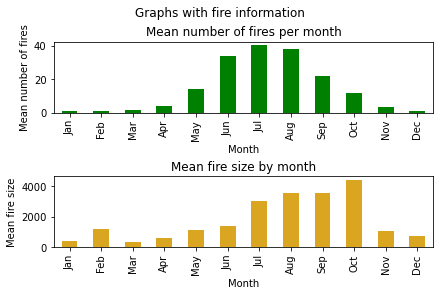

In [24]:
# YOUR CODE HERE
monthly_mean_count = monthly_fire_count_df.mean(axis=0)
monthly_mean_size = monthly_mean_size_df.mean(axis=0)

f, axs = plt.subplots(2, 1, constrained_layout = True)

monthly_mean_count.plot(x = "month",
          kind = "bar",
          color = "green",
          xlabel = "Month",
          ylabel = "Mean number of fires",
          title = "Mean number of fires per month",
          ax = axs[0])

monthly_mean_size.plot(x = "month",
          kind = "bar",
          color = "goldenrod",
          xlabel = "Month",
          ylabel = "Mean fire size",
          title = "Mean fire size by month",
          ax = axs[1])

plt.suptitle('Graphs with fire information')

### DO NOT REMOVE LINE BELOW ###
hist_plot_1 = nb.convert_axes(plt, which_axes="all")


In [25]:
# DO NOT MODIFY THIS CELL
count_hist = PlotTester(hist_plot_1[0])
size_hist = PlotTester(hist_plot_1[1])
bar_plot_1, bar_plot_2 = False, False

try:
    count_hist.assert_plot_type('bar')
    print("\u2705 First plot is a bar plot!")
    bar_plot_1 = True
except AssertionError:
    print("\u274C The first plot is not a bar plot, make sure to make it to a bar plot. Tests will not run successfully if this does not pass.")

try:
    size_hist.assert_plot_type('bar')
    print("\u2705 Second plot is a bar plot!")
    bar_plot_2 = True
except AssertionError:
    print("\u274C The second plot is not a bar plot, make sure to make it to a bar plot. Tests will not run successfully if this does not pass.")


✅ First plot is a bar plot!
✅ Second plot is a bar plot!


## Discuss Your Plot

In the Markdown cell below, answer the following questions using a Markdown list.

1. In what month are fires the largest during the time period represented in the two datasets?
2. In what month are there the most fires during the time period represented in this data?
3. If the above answers are different months, can you think of a reason why this trend might occur?


1. October
2. July
3. Over the summer several smaller fires can combine to form larger ones.

<img style="float: left;" src="colored-bar.png"/>

## Challenge 8: Fires by Cause Data

In the cell below do the following: 

1. Loop through, open and combine all of the files in the 
`earthpy-downloads/ca-fires-yearly/1992-2015-gt-100-acres` directory
2. Add a year column to the data
3. Calculate the total count of fires by "cause" using pandas `df.size()`.

In [26]:
# YOUR CODE HER
fires_by_cause_files = glob(os.path.join(data_path, "1992-2015-gt-100-acres", "*"))

fires_by_cause_list = []
for file in fires_by_cause_files:
    data = pd.read_csv(file)
    year = re.search("([0-9]{4})\.csv", file).group(1)
    data['year'] = year
    list.append(fires_by_cause_list, data)

fires_by_cause_df = pd.concat(fires_by_cause_list)

fires_by_cause = fires_by_cause_df.groupby('cause').size()
fires_by_cause

cause
Arson                 449
Campfire              150
Children               51
Debris Burning        189
Equipment Use         923
Fireworks              10
Lightning             875
Miscellaneous        1013
Missing/Undefined     278
Powerline              64
Railroad               24
Smoking                67
Structure               8
dtype: int64

In [27]:
student_fires_by_cause = fires_by_cause

if isinstance(student_fires_by_cause, pd.Series):
    print("\u2705 Your output is a Pandas Series, good job!")
else:
    print("\u274C Your output is not a Pandas Series, make sure you are running groupby at the end of the cell.")

✅ Your output is a Pandas Series, good job!


In [28]:
# DO NOT MODIFY THIS CELL

In the cell below subset your fires DataFrame so it only contains fires
that are of fire_class_size "G".

In [29]:
# YOUR CODE HERE
g_fires = fires_by_cause_df[fires_by_cause_df.fire_size_class == "G"]

In [30]:
# DO NOT MODIFY THIS CELL
# Test class g filter

student_class_g_fires = g_fires

class_g_points = 0

if len(student_class_g_fires == 394):
    print("\u2705 Correct number of rows in your class G dataframe!")
    class_g_points += 2
else:
    print("\u274C There are not the correct amount of rows in your class G dataframe.")

if all(x == 'G' for x in student_class_g_fires.fire_size_class.to_list()):
    print("\u2705 Successfully filtered dataframe to only contain class G fires!")
    class_g_points += 2
else:
    print("\u274C Dataframe does not contain only class G fires.")

print("\n \u27A1 You received {} out of 4 points for filtering the class G fires correctly.".format(
    class_g_points))
class_g_points

✅ Correct number of rows in your class G dataframe!
✅ Successfully filtered dataframe to only contain class G fires!

 ➡ You received 4 out of 4 points for filtering the class G fires correctly.


4

## Challenge 9: Subset Fire Cause Data

In the cell below, create two dataframe objects:

1. Create one that  contains data for the years 1995 to 2000 (this DF should contain values for 1995 through 2000).
2. Create a dataframe object that contains data for the years1995 to 2000 (this DF should contain values for 2010 through 2015).

At the end of the cell, call both objects on the same line using the syntax:

`df-one, df-two`

The first and last 5 rows for both objects should then print below the cell.

In [31]:
# YOUR CODE HERE
g_fires.year = g_fires.year.astype(int)
fires_1995_2000 = g_fires[g_fires['year'].between(1995, 2000, inclusive = 'both')]
fires_2010_2015 = g_fires[g_fires['year'].between(2010, 2015, inclusive = 'both')]

fires_1995_2000, fires_2010_2015

/var/folders/nb/qps0bcwd16qcyqb4ghpw5sk40000gn/T/ipykernel_84657/3324882506.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g_fires.year = g_fires.year.astype(int)


(     fd_unq_id  source_reporting_unit_name                  fire_name  \
 21     1333522       Sonoma-Lake Napa Unit  BERRYESSA                   
 31      315556        Bakersfield District                      SHELL   
 45     1272339   Cleveland National Forest                   PECHANGA   
 47      365024  Death Valley National Park                      HAPPY   
 48      135309     Sequoia National Forest                     MANTER   
 ..         ...                         ...                        ...   
 99      103776     Sequoia National Forest                      JACKS   
 104     104758     Angeles National Forest                    NARROWS   
 116     217328        Bakersfield District                   WILLIAMS   
 138     103568   Cleveland National Forest                      BAKER   
 141    1328823                 Tulare Unit  FERNANDEZ                   
 
          month  month_num           cause  fire_size fire_size_class state  \
 21        June          6   Eq

In [196]:
# DO NOT MODIFY THIS CELL
# Tests to make sure your dataframes were correctly made

student_g_fires_by_year = fires_1995_2000, fires_2010_2015

if isinstance(student_g_fires_by_year[0], pd.core.frame.DataFrame):
    print("\u2705 Great, your first object is a Pandas DataFrame!")
else:
    print("\u274C Didn't call both dataframes at the end of the cell.")

if isinstance(student_g_fires_by_year[1], pd.core.frame.DataFrame):
    print("\u2705 Great, your second object is a Pandas DataFrame!")
else:
    print("\u274C Didn't call both dataframes at the end of the cell.")

student_df_lengths = len(student_g_fires_by_year[0]), len(
    student_g_fires_by_year[1])

if (84, 88) == student_df_lengths or (88, 84) == student_df_lengths:
    print("\u2705 DataFrames have the correct number of rows in them!")
else:
    print("\u274C One or both of the dataframes doesn't have the correct number or rows in the results.")

✅ Great, your first object is a Pandas DataFrame!
✅ Great, your second object is a Pandas DataFrame!
✅ DataFrames have the correct number of rows in them!


<img style="float: left;" src="colored-bar.png"/>

## Challenge 10: Figure - Fires by Cause

Create a figure with two stacked subplots that rendered as **scatterplots** (points) using `ax.plot()` to plot the `1992-2015-gt-100-acres` data. 

For each subplot: 

* Only include points that represent fires of size_class `G` (this is data that you subsetted above).
* Color the points in your plot using the `cause` column in your data. There are a few ways to do this, but for this exercise, color the points by `human-caused` vs `Non-human caused` using a **conditional statement**
within the for loop that you write to create your plot. 

The following causes should be labeled as `human-caused`

`["Arson", "Smoking", "Equipment Use", "Campfire", "Powerline", "Railroad"]`

(HINT: To make the plot look like a scatter plot you can adjust the line and marker options on the plot)

You will use the data / `DataFrame` that you worked with above in the  `1992-2015-gt-100-acres` directory to produce this plot. 

1. The top subplot will contain fires colored by cause for the years: 2010-2015
2. The bottom subplot will contain fires colored by cause for the years 1995-2000


To create these plots, you will need to create a for loop that plots groups pandas dataframes. 

*********
HINT:

* A conditional statement can be used to test whether a string is in an existing list of strings:
```
list_of_things = ["item1", "item2"]

if acategory in list_of_things:
    # Set color
else:
    # Set color  
```

For your plot, be sure to do the following:

1. Use a shared x and y axis by adding `sharex` and `sharey` to your `plt.subplots()` call
example: `plt.subplots(sharex=True)`
2. Use `.scatter()` to create your plot.
3. Add titles to each subplot
4. Color each category by human vs other cause. You should have a total of two colors  on your plot.
5. Add an overall figure title
6. Add a legend for each plot. The legend should have multiple "causes" (e.g. arson, lightning, etc) but only two different point colors (one for human caused and one for non human caused) 


/var/folders/nb/qps0bcwd16qcyqb4ghpw5sk40000gn/T/ipykernel_84657/3918925400.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fires_2010_2015['color'] = ['green' if cause in human_caused else 'purple' for cause in fires_2010_2015.cause]
/var/folders/nb/qps0bcwd16qcyqb4ghpw5sk40000gn/T/ipykernel_84657/3918925400.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fires_1995_2000['color'] = ['green' if cause in human_caused else 'purple' for cause in fires_1995_2000.cause]


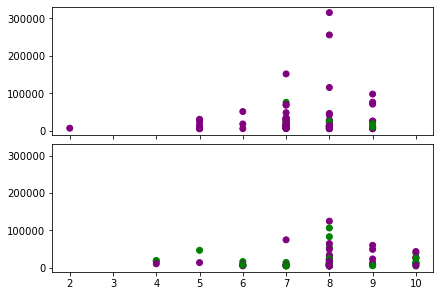

In [33]:
# YOUR CODE HERE
human_caused = ["Arson", "Smoking", "Equipment Use", "Campfire", "Powerline", "Railroad"]
fires_2010_2015['color'] = ['green' if cause in human_caused else 'purple' for cause in fires_2010_2015.cause]
fires_1995_2000['color'] = ['green' if cause in human_caused else 'purple' for cause in fires_1995_2000.cause]

fires_2010_2015

f, axs = plt.subplots(2, 1, constrained_layout=True, sharex=True, sharey=True)

axs[0].scatter(
    x = "month_num",
    y = "fire_size",
    c = "color",
    data = fires_2010_2015
)

axs[1].scatter(
    x = "month_num",
    y = "fire_size",
    c = "color",
    data = fires_1995_2000
)

### DO NOT REMOVE LINE BELOW ###
fire_causes_plot = nb.convert_axes(plt, which_axes="all")

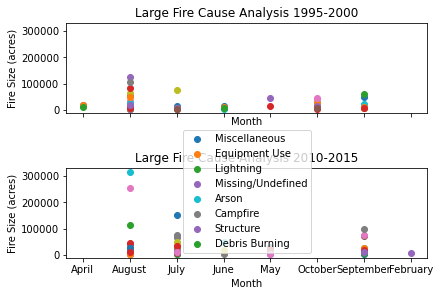

In [43]:

plot_grp_one = fires_1995_2000.groupby(['month'])

fig, axs = plt.subplots(2, 1, constrained_layout=True, sharex=True, sharey=True)
for month, fire_list in plot_grp_one:
    for cause, fire_size in zip(fire_list.cause.values, fire_list.fire_size.values):
        axs[0].scatter(month,
                   fire_size,
                   label=cause)
axs[0].set(title="Large Fire Cause Analysis 1995-2000",
            xlabel="Month",
            ylabel="Fire Size (acres)")

plot_grp_two = fires_2010_2015.groupby(['month'])

for month, fire_list in plot_grp_two:
    for cause, fire_size in zip(fire_list.cause.values, fire_list.fire_size.values):
        axs[1].scatter(month,
                   fire_size,
                   label=cause)
axs[1].set(title="Large Fire Cause Analysis 2010-2015",
            xlabel="Month",
            ylabel="Fire Size (acres)")

handles, labels = axs[1].get_legend_handles_labels()
unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
axs[1].legend(*zip(*unique))

plt.show()

In [218]:
# NOTE: 2010-2015 Data NEEDS TO BE THE TOP PLOT FOR THE AUTOGRADER TO WORK!

if len(fire_causes_plot) == 2:
    print("\u2705 You successfully added two plots to your figure, good job!")
else:
    print("\u274C There are not two plots in your figure, make sure you plot the 2000 and 2015 data.")

✅ You successfully added two plots to your figure, good job!


In [219]:
# DO NOT MODIFY THIS CELL

In [220]:
# DO NOT MODIFY THIS CELL

## Challenge 11: Discuss Your Plot

Look at the plot above. Do you notice a difference in fire size between 1995-2000 and 2010-2015?
Add your answer to the markdown cell below.

YOUR ANSWER HERE

## Pep 8, Spelling and Does the Notebook Run?
In this cell, we will give you points for the following

1. PEP 8 is followed throughout the notebook (4 points)
2. Spelling and grammar are considered in your written responses above (4 points)
3. The notebook runs from top to bottom without any editing (it is reproducible) - 4 points